<a href="https://colab.research.google.com/github/Clarke-Jools-36/diss-gw/blob/testing/autoencoder_v1.3_timefreqplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am going to attempt to set up a simple autoencoder. First I need to create data on which to test and train the autoencoder. I will create gravitational wave sections 1 second long with 1024 samples. 
I will also create artefacts which are not gravitational waves. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [88]:
t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
a = np.zeros_like(t) #create an array of zeros to populate with amplitude values

In [89]:
print(len(a))
print(len(a)==len(t)) #idiot check early :)

1024
True


Lets start with an artifact, a sin wave which has amplidue of a bell curve

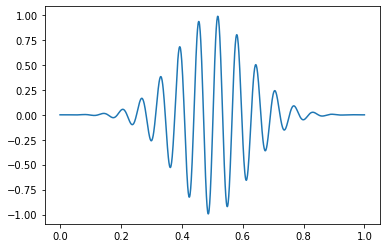

In [90]:
## SIN WAVE ##
A = 0 #amplitude
B = 0.01 #period
C = 0 #phase shift (horizontal)
D = 0 #amplitude shift (vertical)
## BELL CURVE ##
b = 0.03 #width of bell curve describing amplitude
c = 0.5  #phase shift (horizontal) of bell curve

for i,t_ in enumerate(t):
  A = np.e**( -((t_-c)**2 / b) ) #setting amplidude to bell curve
  #plt.plot(t_, A, "x")

  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)

We can also make the frequency of the sin wave lower at the tail ends. 

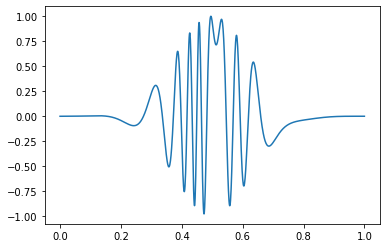

In [91]:
for i,t_ in enumerate(t):
  A = np.e**( -((t_-c)**2 / b) ) #setting amplidude to bell curve
  
  B = -0.035 * (np.e**( -((t_-c)**2 / b) )) + 0.05 #setting freq to bell curve
  #plt.plot(t_, B, "x")
  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)

Something funky is happening here, potentially because of the syncing with the sample rate?

Lets move on to grav wave like signals. These are less symettrical



In [6]:
t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
a = np.zeros_like(t) #create an array of zeros to populate with amplitude values

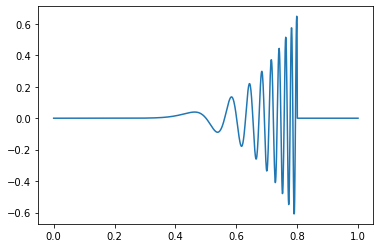

In [7]:
## SIN WAVE ##
A = 0 #amplitude
B = 0.01 #period
C = 0 #phase shift (horizontal)
D = 0 #amplitude shift (vertical)
## POLYNOMIAL ##
b = 2 #amplitude of amplitude polynomial
c = 0.005 #amplitude of freq polynomial
d = 5 #degree of polynomial
for i,t_ in enumerate(t):
  if 0<t_<0.8:
    A = 2*t_**5 # amplitude increases with polynomial 5
    B = 0.005/t_**5 #freq increases
  else:
    A = 0

  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)

Lets make some functions, and save this data

In [102]:
def blip(seed = None):
  if seed == None:
    seed = np.random.randint(0,999999)
  np.random.seed(seed)


  t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
  a = np.zeros_like(t) #create an array of zeros to populate with amplitude values
  A,B,C,D,b,c = 0,0.01,((np.random.rand()-0.5)),0,0.03 + (0.05*(np.random.rand()-0.5)),0.5 + (0.5*(np.random.rand()-0.5))

  randomA = (0.5*(np.random.rand()-0.5)) #maximum amplitude

  for i,t_ in enumerate(t):
    A = randomA * np.e**( -((t_-c)**2 / b) ) #setting amplidude to bell curve
    B = abs(-0.035 * (np.e**( -((t_-c)**2 / b) )) + 0.05) #setting freq to bell curve
    a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

  return {"data":{"time":t,"amplitude":a},"seed":seed}


In [9]:
def wave(seed = None):
  if seed == None:
    seed = np.random.randint(0,999999)
  np.random.seed(seed)


  t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
  a = np.zeros_like(t) #create an array of zeros to populate with amplitude values

  A,B,C,D,b,c,d = 0,0.01,((np.random.rand()-0.5)),0,2 + ((np.random.rand()-0.5)),0.005 + (0.001*(np.random.rand()-0.5)),5

  randomA = (0.5*(np.random.rand()-0.5)) #maximum amplitude

  for i,t_ in enumerate(t):
    if 0<t_<0.75+C/2:
      A = randomA * 2*t_**5 # amplitude increases with polynomial 5
      B = 0.005/t_**5 #freq increases
    else:
      A = 0

    a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

  return {"data":{"time":t,"amplitude":a},"seed":seed}



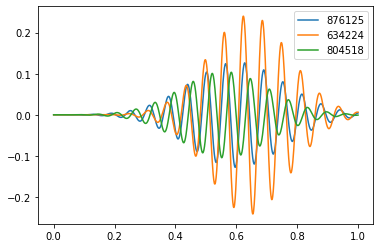

In [10]:
blip_ = blip()
plt.plot(blip_["data"]["time"],blip_["data"]["amplitude"], label = blip_["seed"])
blip_ = blip()
plt.plot(blip_["data"]["time"],blip_["data"]["amplitude"], label = blip_["seed"])
blip_ = blip()
plt.plot(blip_["data"]["time"],blip_["data"]["amplitude"], label = blip_["seed"])

plt.legend()

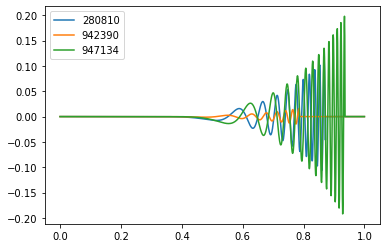

In [11]:
wave_ = wave()
plt.plot(wave_["data"]["time"],wave_["data"]["amplitude"], label = wave_["seed"])
wave_ = wave()
plt.plot(wave_["data"]["time"],wave_["data"]["amplitude"], label = wave_["seed"])
wave_ = wave()
plt.plot(wave_["data"]["time"],wave_["data"]["amplitude"], label = wave_["seed"])


plt.legend()

lets make frequency time plots

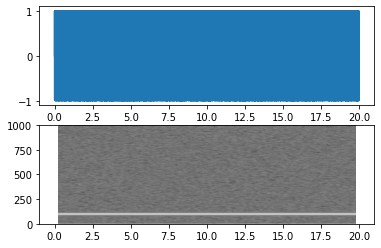

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1  + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()

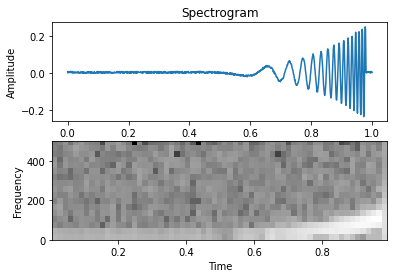

In [113]:
wave_ = wave()
 

# Read the data

samplingFrequency, signalData = 1024, wave_["data"]["amplitude"]
signalTime = wave_["data"]["time"]



nse = 0.01 * np.random.random(size=len(signalData))
# Plot the signal read from wav file

plt.subplot(211)

plt.title('Spectrogram')

 

plt.plot(signalTime,signalData+nse)

plt.xlabel('Sample')

plt.ylabel('Amplitude')

 

plt.subplot(212)

plt.specgram(signalData+nse,Fs=samplingFrequency, vmin=None, vmax=None,noverlap=16, NFFT=32)

plt.xlabel('Time')

plt.ylabel('Frequency')
plt.axis(ymin=0, ymax=500)
 

plt.show()


def save_figure_to_numpy(fig):
    # save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data 

Time to start thinking about the autoencoder

In [12]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 16  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))  #1024 make it this! #####################################
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)  #1024 make it this!####################

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Now we create an encoder model

In [13]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

and a decoder model

In [14]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

HOLD UP, LETS TRY USING MINST FIRST

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


now lets train for 50 epochs

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 23ms/step - loss: 0.3073 - val_loss: 0.2201
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1988 - val_loss: 0.1815
Epoch 3/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1728 - val_loss: 0.1626
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1580 - val_loss: 0.1512
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1491 - val_loss: 0.1446
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1441 - val_loss: 0.1413
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1412 - val_loss: 0.1387
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1389 - val_loss: 0.1365
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1370 - val_loss: 0.1349
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1354 - val_lo

lets visualise

In [19]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


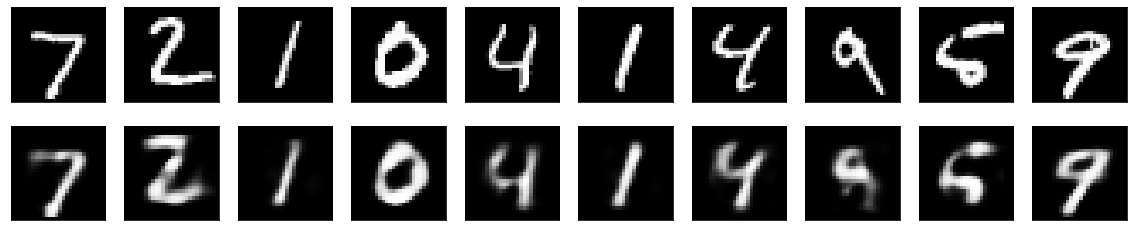

In [20]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()